In [8]:
%matplotlib inline
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA
import imageio as imio

In [4]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'
test_features = np.load('./data/test/test_inception_features_array.npy')

In [5]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

In [6]:
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


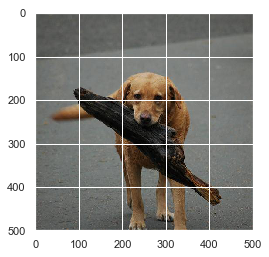

In [9]:
print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)


In [24]:
##Amount of labels
np.unique(labels).shape[0]

120

In [46]:
#### PCA 2 dimensions ######
x = features
pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(x)
X2D = pd.DataFrame(data = principalComponents, 
                    columns = ['pca_1','pca_2'])
X2D = principalComponents

In [47]:
print(x.shape)
print(X2D.shape)

(10222, 2048)
(10222, 2)


Text(0, 0.5, 'component 2')

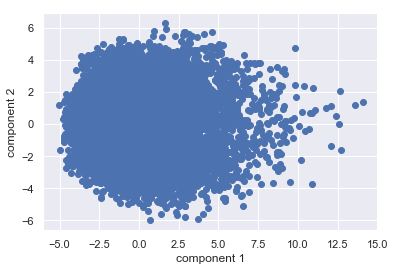

In [48]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [49]:
## K-means
kmeans = KMeans(n_clusters=120)
Km = kmeans.fit(X2D)

In [50]:
clusters = kmeans.predict(X2D)

In [51]:
kmeans.cluster_centers_.shape

(120, 2)

In [52]:
centers = kmeans.cluster_centers_

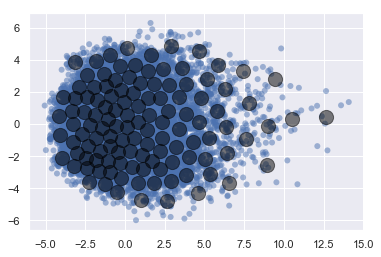

In [54]:
plt.scatter(X2D[:, 0], X2D[:, 1],
             edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


## t-SNE

In [55]:
from sklearn.manifold import TSNE 

In [56]:
tsne = TSNE(n_components=2)
tsne_model = tsne.fit_transform(features)

In [60]:
tsne_predict = tsne.fit_transform(features[1:1000])

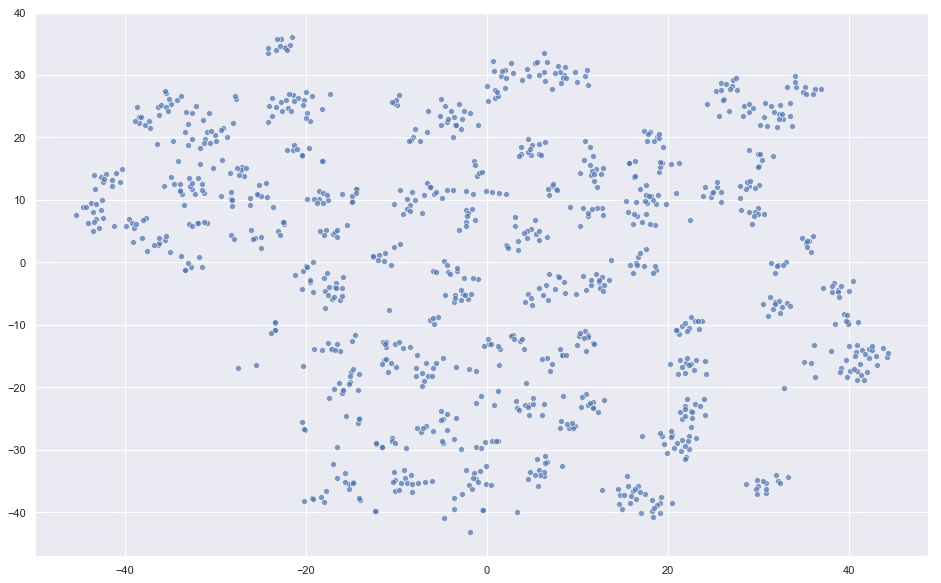

In [61]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    tsne_predict[:,0], 
    tsne_predict[:,1],
    alpha = 0.7
)

In [ ]:
##